<a href="https://colab.research.google.com/github/ro4402/blank-app/blob/main/skyfield_alt_of_riseset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **套件導入/設定**

In [ ]:
!pip install matplotlib
!pip install skyfield==1.49

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.2/336.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.3/232.3 kB 15.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skyfield import almanac; from skyfield.api import load, wgs84; from skyfield.magnitudelib import planetary_magnitude
import ipywidgets as widgets
from IPython.display import display
import datetime; from dateutil.relativedelta import relativedelta


允許matplotlib產生含中文字元的圖片

In [ ]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

plt.rc('font', size = 14)   #global size
plt.rc('axes', titlesize = 24)
plt.rc('axes', titlepad = 30)
plt.rc('axes', labelsize = 16)
plt.rc('axes', labelpad = 24)

--2025-01-22 06:04:36--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.141.139, 74.125.141.113, 74.125.141.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.141.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-01-22 06:04:36--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.217.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2025-01-22 06:04:39 

# **計算設定(skyfield)**

導入星曆表(DE440)，從星曆表取用各個天體的軌道參數

In [ ]:
eph = load('de440.bsp')
ts = load.timescale()

earth, sun = eph['EARTH'], eph['SUN']
mercury, venus, mars, jupiter, saturn, uranus, neptune = eph['MERCURY'], eph['VENUS'], eph['MARS BARYCENTER'], eph['JUPITER BARYCENTER'], eph['SATURN BARYCENTER'], eph['URANUS BARYCENTER'], eph['NEPTUNE BARYCENTER']

[#################################] 100% de440.bsp


計算期間內每天的太陽升/落事件的時間

In [ ]:
def riseset_time(start, end, observer, whereis_sun):
  f = almanac.sunrise_sunset(eph, observer)
  t, y = almanac.find_discrete(start, end, f)
  sun_riseset = (y == whereis_sun) #sunset: whereis_sun = 0, sunrise: whereis_sun = 1
  t = t[sun_riseset]
  return t

計算給定時間串列中某時間行星的高度角、方位角、亮度、與地球距離

In [ ]:
def apparent(observer,planet,t):
  apparent_para = (earth + observer).at(t).observe(planet).apparent()
  alt, az, distance = apparent_para.altaz()
  x, y = az.degrees, alt.degrees
  m = planetary_magnitude(apparent_para)
  return x, y, m, distance

# **使用者設定(每一欄都須選取)**

使用者設定

In [ ]:
def f_loc(lat, lon):
  observer = [lat, lon]
  return observer
lat = widgets.BoundedFloatText(value = 25.0958, min = -65.0000, max = 65.0000, description = '緯度', disabled = False)
lon = widgets.BoundedFloatText(value = 121.5183, min = -180.0000, max = 180.0000, description = '經度', disabled = False)
widgets.interact(f_loc, lat = lat, lon = lon)

#####

def f_target(planet):
    return planet.target_name
planet = widgets.Dropdown(
    options=[('水星',mercury), ('金星',venus), ('火星',mars), ('木星',jupiter), ('土星',saturn), ('天王星',uranus), ('海王星',neptune)],
    value=mercury,
    description='行星',
)
widgets.interact(f_target, planet = planet)

#####

start_date = widgets.DatePicker(description='開始日期', disabled=False, value = datetime.date.today())
end_date = widgets.DatePicker(description='結束日期', disabled=False, value = datetime.date.today()+relativedelta(years=1))
def f_date(start_date, end_date):
  duration_days = (end_date-start_date).days
  print("天數={}天".format(duration_days))
widgets.interact(f_date, start_date = start_date, end_date = end_date)

#####

whereis_sun = widgets.Dropdown(
    options=[('日出',1), ('日落',0)],
    value=1,
    description='日出/日落',
)
def f_status(whereis_sun: int):
    return whereis_sun
widgets.interact(f_status, whereis_sun = whereis_sun)

#####

text = widgets.Dropdown(
    options=[('有日期',True), ('無日期',False)],
    value=True,
    description='日期標註',
)
def f_status(text):
    return text
widgets.interact(f_status, text = text)


interactive(children=(BoundedFloatText(value=25.0958, description='緯度', max=65.0, min=-65.0), BoundedFloatText…

interactive(children=(Dropdown(description='行星', options=(('水星', <VectorSum of 2 vectors:
 'de440.bsp' segment…

interactive(children=(DatePicker(value=datetime.date(2025, 1, 22), description='開始日期'), DatePicker(value=datet…

interactive(children=(Dropdown(description='日出/日落', options=(('日出', 1), ('日落', 0)), value=1), Output()), _dom_…

interactive(children=(Dropdown(description='日期標註', options=(('有日期', True), ('無日期', False)), value=True), Outpu…

<function __main__.f_status(text)>

# **繪製**

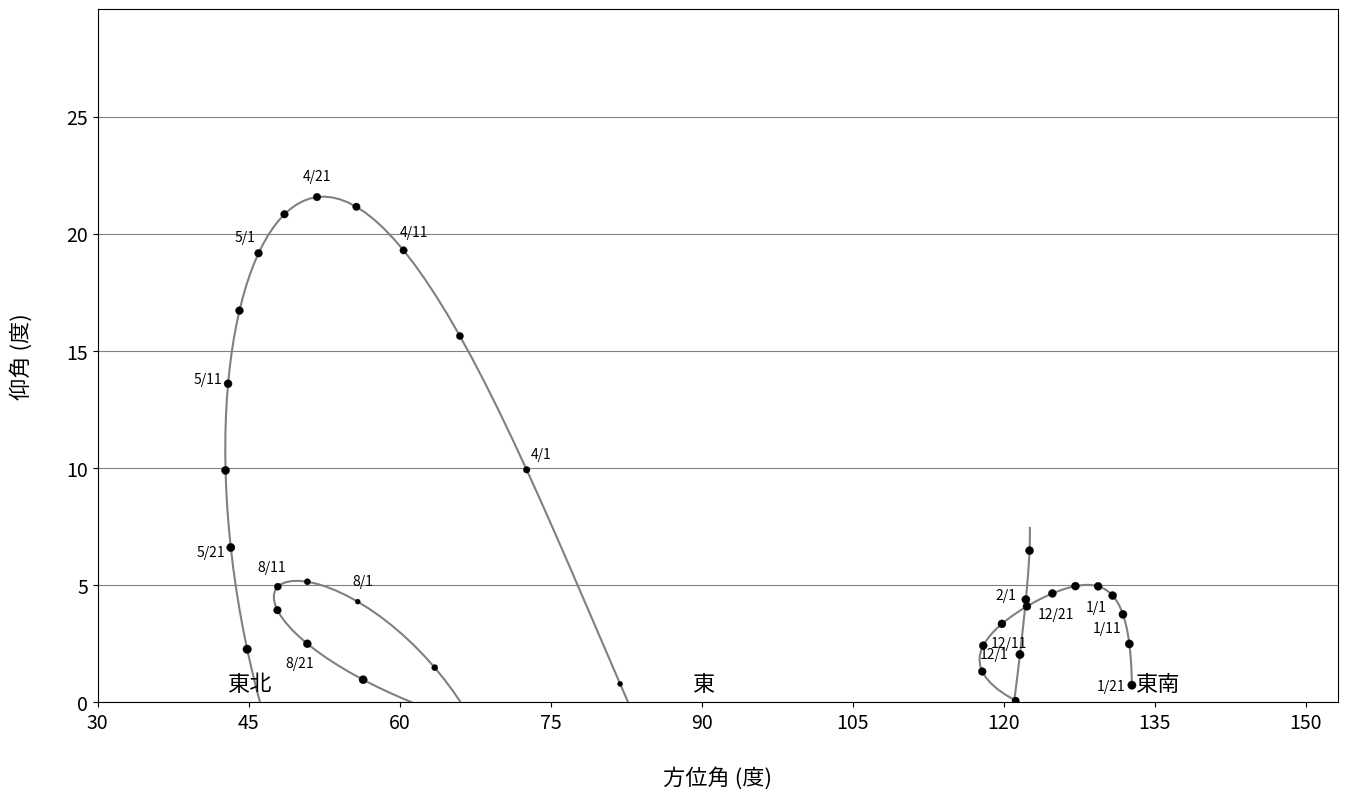

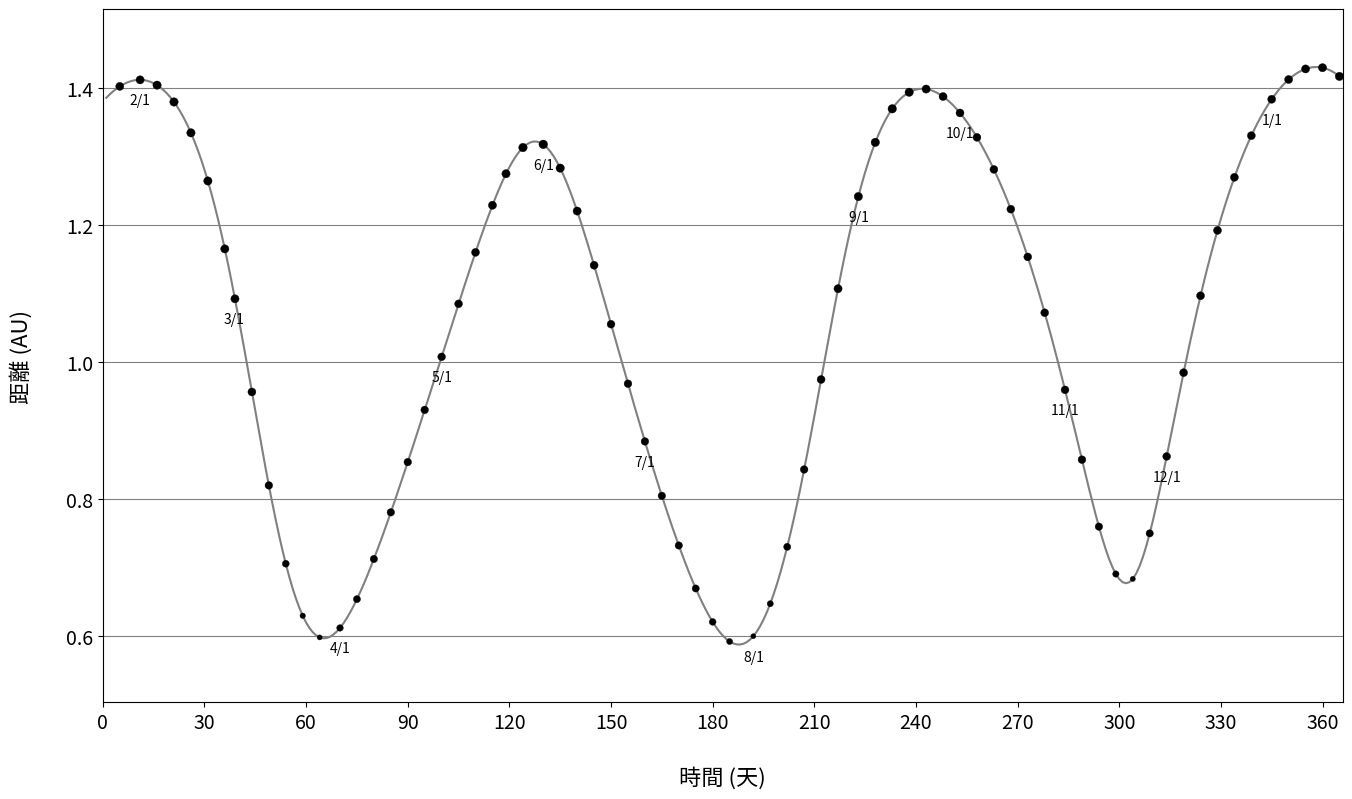

In [ ]:
# 將使用者輸入的數值轉換為skyfield可讀型式
obs = wgs84.latlon(lat.value, lon.value)
start = ts.utc(start_date.value.year,start_date.value.month,start_date.value.day)
end = ts.utc(end_date.value.year,end_date.value.month,end_date.value.day)

# 計算太陽每天的升/落時間，再計算該時間行星的方位角、仰角、亮度與距離
riseset = riseset_time(start, end, obs, whereis_sun.value)
az, alt, m, distance = apparent(obs,planet.value,riseset)
year, month, day, hour, minute, second = riseset.utc
month = month.astype(int)
day = day.astype(int)

# 將行星亮度m均值化
maxmag = max(m)
minmag = min(m)
size = 40 - 30 * (m - minmag) / (maxmag - minmag)

# 圖片1：日出/日落時行星的方位角與仰角
fig1, ax1 = plt.subplots(figsize=[16, 9])
ax1.plot(az, alt, c='grey', zorder=1)  #行星軌跡連續線
fives = (day % 5 == 1) & (day < 30) #每5天標註一點
ax1.scatter(az[fives], alt[fives], size[fives], 'black',
           edgecolor='black', linewidth=0.25, zorder=2)
offset_x, offset_y = 15, 15
for i in np.flatnonzero(fives):
    if i == 0:
        continue
    day_i = day[i]
    xi = az[i]
    yi = alt[i]
    dx = xi - az[i-1]
    dy = yi - alt[i-1]
    length = np.sqrt(dx*dx + dy*dy)
    dx /= length
    dy /= length
    side = 'right' if (year[i], month[i], day[i])>(2024, 9, 30) else 'left' #TODO 字重疊問題
    if side == 'left':
        xytext = - offset_x*dy, offset_y*dx
    else:
        xytext = offset_x*dy, - offset_y*dx

    # 日期為1、11、21時標註日期
    if day_i in (1, 11, 21)and text.value:
        ax1.annotate("{}/{}".format(month[i],day_i), (xi, yi), c='black', ha='center', va='center',
                    textcoords='offset points', xytext=xytext, size=10)

points = '北 東北 東 東南 南 西南 西 西北'.split()
for i, name in enumerate(points):
    xy = 45.1* i, 0.5
    ax1.annotate(name, xy, c='black', ha='center', size=16, weight='bold')
ax1.set(
    xlabel='方位角 (度)',
    ylabel='仰角 (度)',
    xlim=(max(min(az) - 8.0, 0), min(max(az) + 8.0, 360)),
    ylim=(0, min((max(alt) + 8.0), 90)),
    xticks=np.arange(max(min(az) - 8.0, 0)//15.0*15, min(max(az) + 8.0, 360), 15)//15.0*15,
)
ax1.grid(c='grey',axis='y')


# 圖片2：行星每天與地球的距離
fig2, ax2 = plt.subplots(figsize=[16, 9])
numofdays = np.arange(1,end-start+1,1)
dis_au = distance.au
ax2.plot(numofdays, dis_au, c='grey', zorder=1)  #行星軌跡連續線
fives = (day % 5 == 1) & (day < 30) #每5天標註一點
ax2.scatter(numofdays[fives], dis_au[fives], size[fives], 'black',
           edgecolor='black', linewidth=0.25, zorder=2)
offset_x, offset_y = 15, 15
for i in np.flatnonzero(fives):
    if i == 0:
        continue
    day_i = day[i]
    xi = numofdays[i]
    yi = dis_au[i]
    dx = xi - numofdays[i-1]
    dy = yi - dis_au[i-1]
    length = np.sqrt(dx*dx + dy*dy)
    dx /= length
    dy /= length
    side = 'right' if (year[i], month[i], day[i])>(2024, 9, 30) else 'left' #TODO 字重疊問題
    if side == 'left':
        xytext = - offset_x*dy, offset_y*dx
    else:
        xytext = offset_x*dy, - offset_y*dx

    # 日期為1時標註日期
    if day_i == 1 and text.value:
        ax2.annotate("{}/{}".format(month[i],day_i), (xi, yi), c='black', ha='center', va='center',
                    textcoords='offset points', xytext=xytext, size=10)
ax2.set(
    xlabel='時間 (天)',
    ylabel='距離 (AU)',
    xlim=(0, numofdays.size+1),
    ylim=(min(dis_au)-(max(dis_au)-min(dis_au))*0.1, max(dis_au)+(max(dis_au)-min(dis_au))*0.1),
    xticks=np.arange(1,end-start+1,30)//30*30
)
ax2.grid(c='grey',axis='y')

In [ ]:
print(len(riseset))
print(riseset)


365
<Time tt=[2460698.319939285 ... 2461062.3179181754] len=365>
